# Optimizing Boston's 311 Service: Resource Allocation, Response Efficiency, and Community Needs

**Team 8** : Aashrith Kandhada, Jooyeon Lee, Nimisha Agarwal, Peng Zhao, Shuomeng Guan, Zicheng Wang

##Executive Summary

**Objectives**

* **Identify Service Gaps and Optimize Resources:** Evaluate neighborhood-specific needs to address geographic service gaps and improve resource allocation.
* **Analyze Time-Based Trends:** Study seasonal and time-of-day patterns to enhance response efficiency during peak demand periods.
* **Integrate Weather Data:** Examine the impact of weather conditions on service demand to inform proactive and responsive resource planning.

**Findings**

* **High-Demand Neighborhoods and Services:** Neighborhoods such as Dorchester, Roxbury, South Boston, and Allston/Brighton generate the highest 311 request volumes, requiring focused resource allocation.

* **Seasonal Demand Peaks:** Warmer months see surges in parking enforcement and waste management requests, while winter months highlight spikes in sidewalk maintenance needs.

* **Departmental Response Variability:** PROP and ECON departments face longer average response times for complex issues, while GEN_ maintains consistently high on-time performance.

* **Impact of Temperature on Requests:** Colder months increase requests for sidewalk clearing and street cleaning, while warmer months amplify parking enforcement and waste compliance demands.
* **Shifts in Digital Engagement:** While digital reporting via the Citizens Connect App is growing, traditional phone calls remain critical for accessibility.

**Recommendations**

* **Enhance Resource Allocation to Meet Peak Demands:** Direct resources to high-demand neighborhoods like Dorchester and South End. Anticipate summer surges by increasing staff for parking enforcement and sanitation services.
* **Seasonal and Weather-Responsive Planning:** Allocate additional winter staff for sidewalk maintenance and prepare summer teams to address heightened demands for parking enforcement and waste management.
* **Streamline Operations to Improve Response Times:** Strengthen interdepartmental coordination, cross-train staff, and automate routine workflows to reduce delays in handling complex requests.
* **Promote Digital Accessibility Across Neighborhoods:** Increase awareness of digital services like the Citizens Connect App in neighborhoods with lower app usage while maintaining robust phone support for non-digital users.

## ERD Diagram

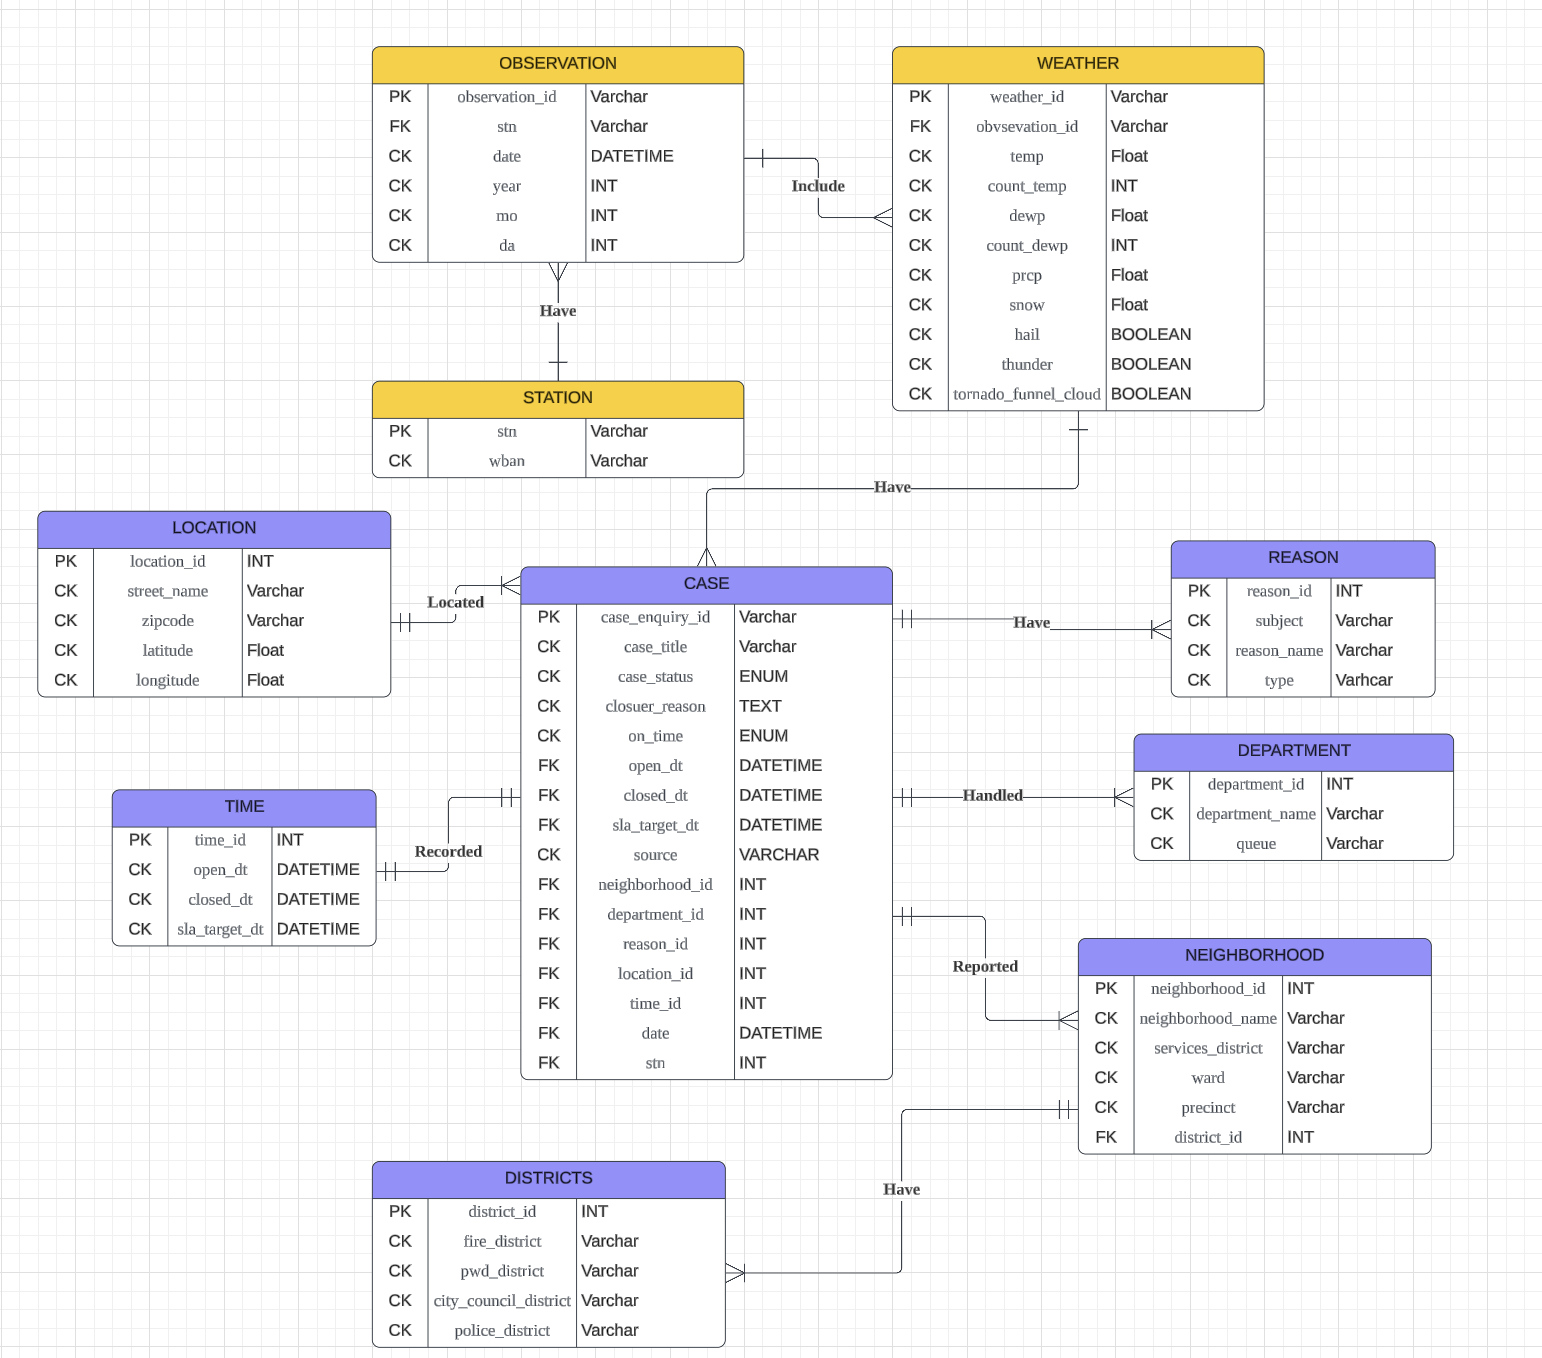

## Business Problem Definition

This project aims to assess and optimize resource allocation, identify request patterns, and improve response efficiency across Boston's 311 service requests in 2024. Specifically, this project will dive into the following issues:

* Geographic Distribution and Service Gaps
* Time-based Analysis to Identify Request Patterns
* Enhance Response Timeliness

## Motivation

This analysis will allow the City of Boston to leverage 311 data for a smarter, more responsive public service. By optimizing resource allocation and enhancing the 311 system's efficiency, the city can improve service for residents, reduce operational costs, and enhance overall city management.

## Analsyis at a Glance

The dashboards comprises of visuals of the keys insights obtained from the study.

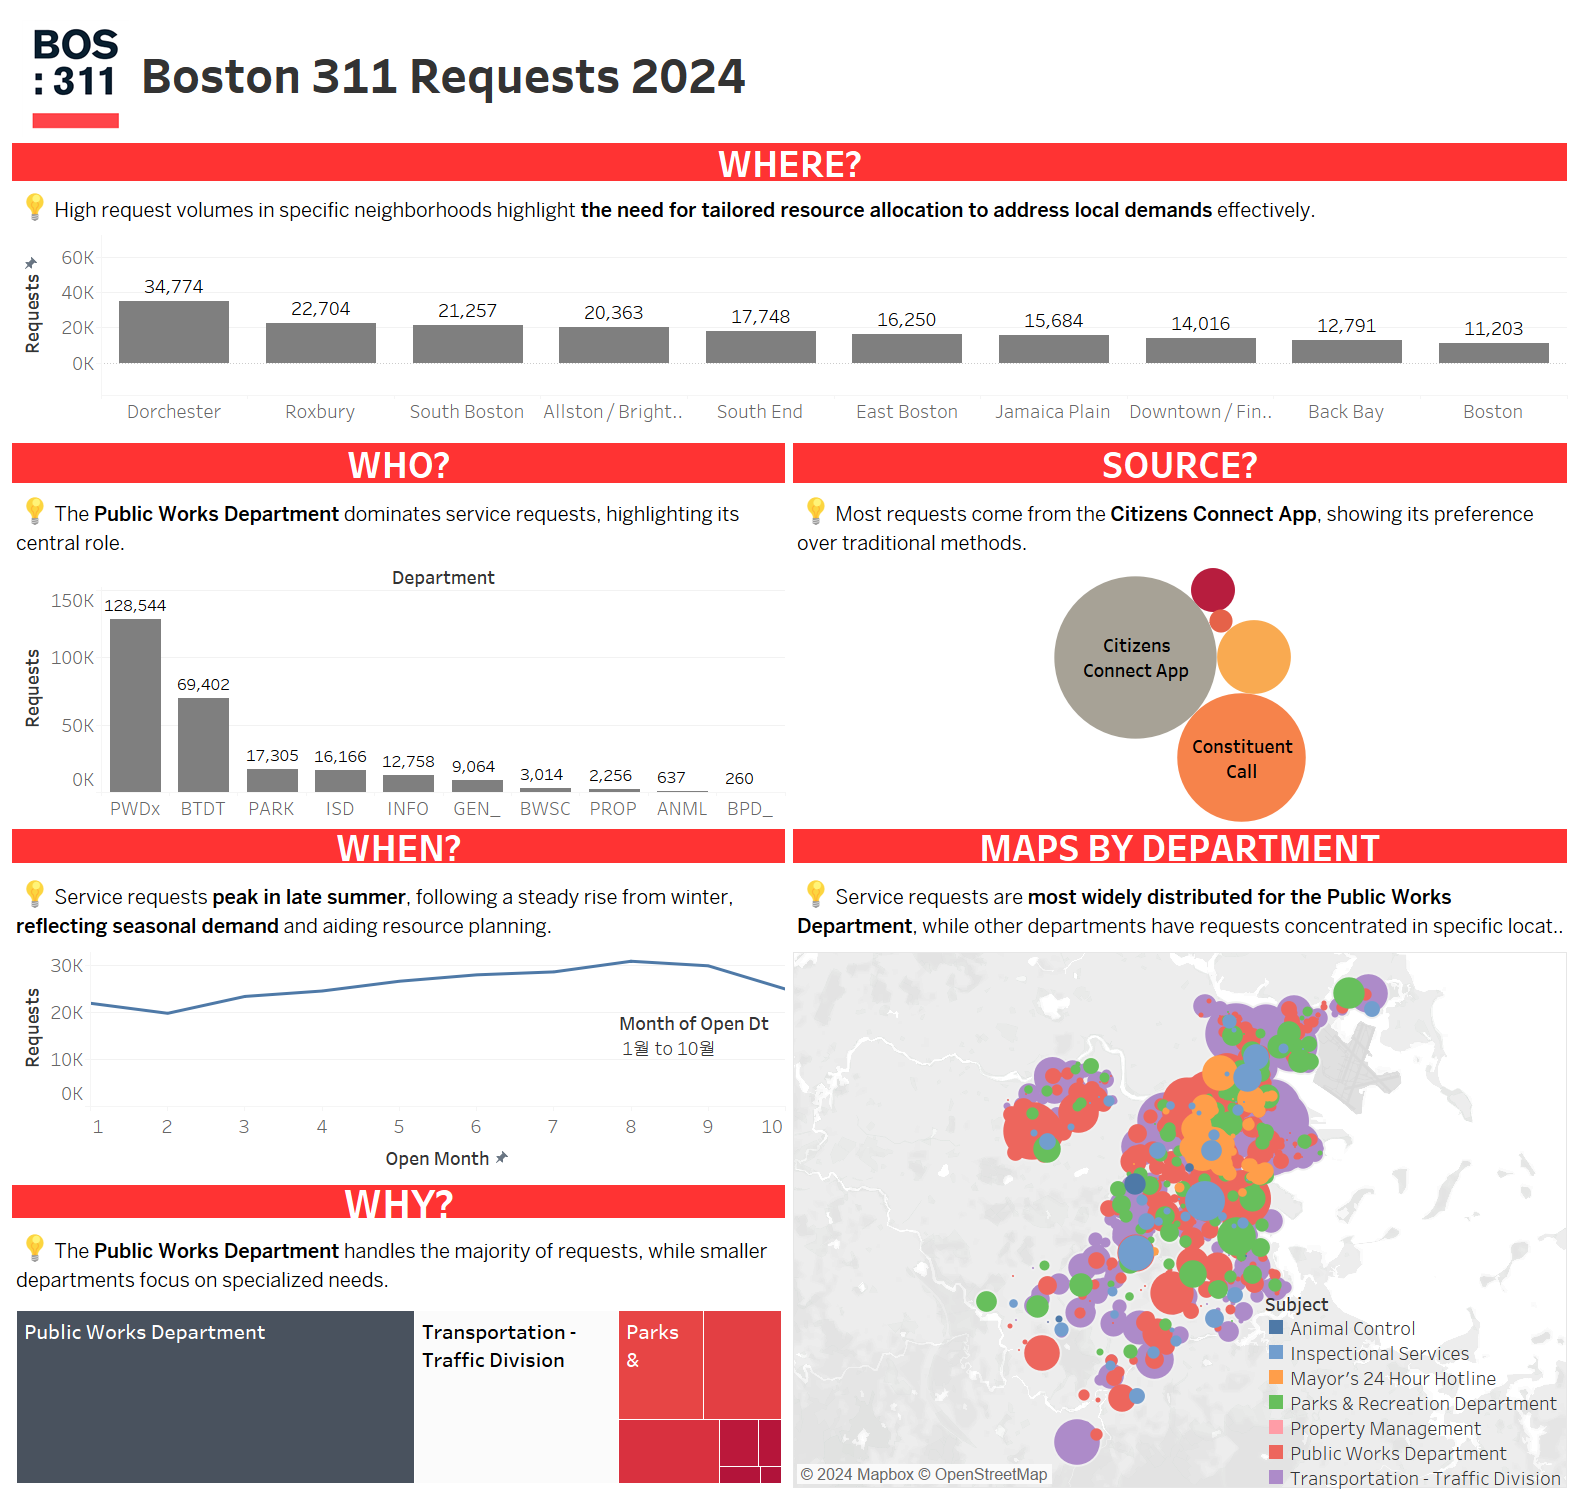

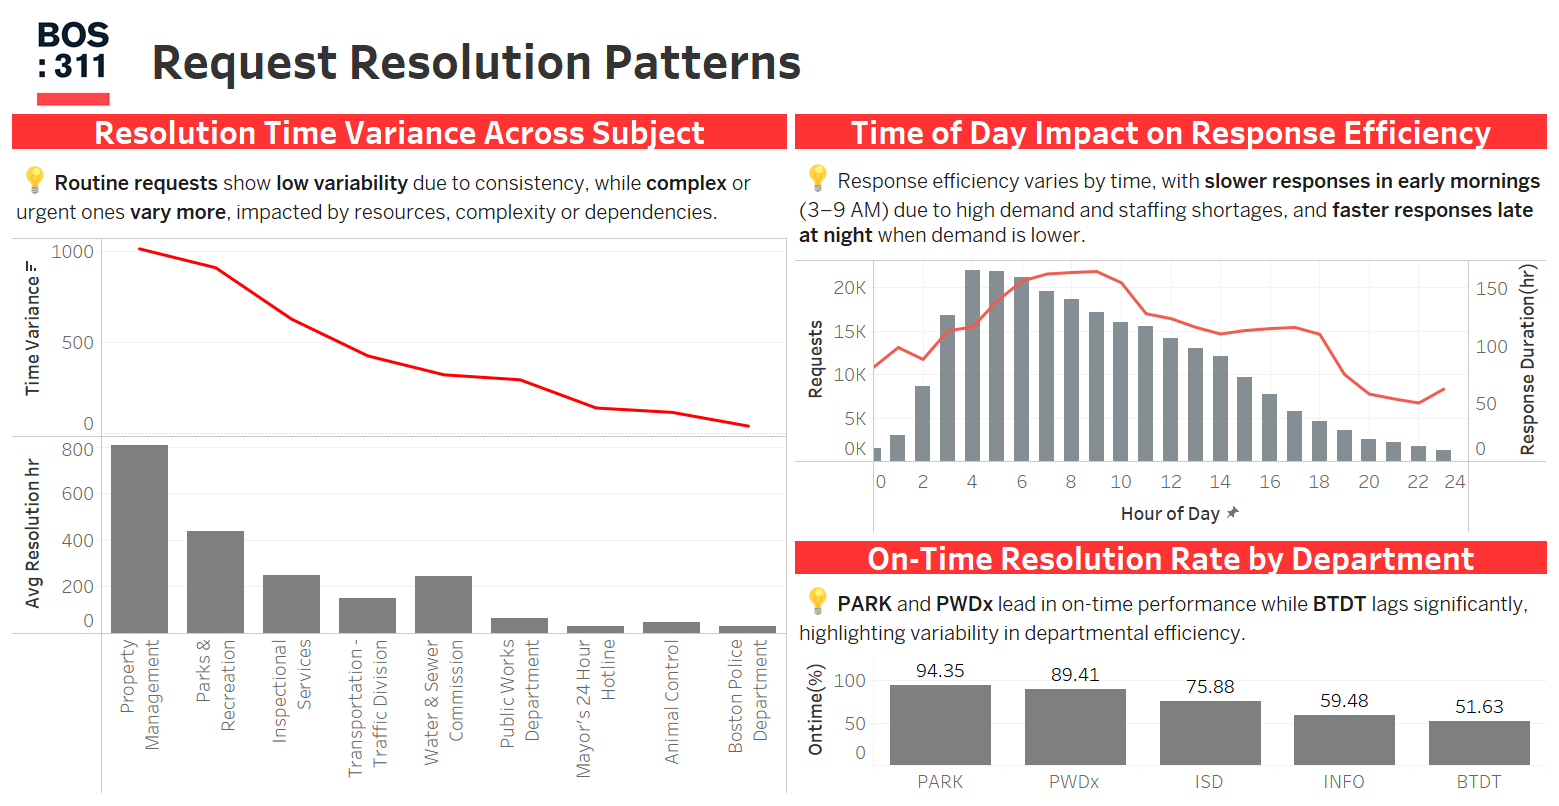

Dashboard 1: https://public.tableau.com/views/311_team8_Dashboard1/Dashboard1?:language=ko-KR&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

Dashboard 2: https://public.tableau.com/views/311_team8_Dashboard2/Dashboard2?:language=ko-KR&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

## Data & Source

* **Main Dataset**: City Constituent Relationship Management (CRM) system; Direct access link: https://www.cityofboston.gov/311/

* **Supplementary for Weather Data**: BigQuery Public Dataset from Google Cloud; Direct access link: https://console.cloud.google.com/bigquery?project=ba775-eg&ws=!1m5!1m4!4m3!1sbigquery-public-data!2snoaa_gsod!3sgsod2024&inv=1&invt=AbhgCg.


The primary dataset, sourced from the City Constituent Relationship Management (CRM) system, will be used to conduct the core analysis of Boston’s 311 service requests. Additionally, the supplementary weather dataset from BigQuery's public data will be integrated for a detailed analysis of how weather conditions may impact service requests, allowing us to explore potential correlations between environmental factors and service demand.

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
%%bigquery --project ba775-project-team-8
SELECT *
FROM `ba775-project-team-8.boston_311_requests.311 Requests Data`
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,_id,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source
0,77989,101005404685,2024-04-09 12:10:00+00:00,2024-08-07 12:10:00+00:00,2024-04-10 09:40:38+00:00,ONTIME,Closed,Case Closed. Closed date : 2024-04-10 13:40:38...,Lead,Inspectional Services,...,Greater Mattapan,13,Ward 14,1403,21 Michigan Ave,2121,42.302400,-71.083471,0101000020E61000007F64309557C551C024165C07B526...,Constituent Call
1,92464,101005706306,2024-10-01 05:52:00+00:00,2025-01-29 04:52:15+00:00,NaT,ONTIME,Open,,SCH10/9Lead,Inspectional Services,...,Allston / Brighton,15,21,2109,1316 Commonwealth Ave,2134,42.348238,-71.134325,0101000020E61000003A122AC898C851C0C1F8FC0D932C...,Constituent Call
2,60907,101005745520,2024-10-24 13:07:00+00:00,2026-10-14 13:07:30+00:00,NaT,ONTIME,Open,,Egress,Inspectional Services,...,Charlestown,2,Ward 2,0203,5 Cross St,2129,42.376570,-71.062630,0101000020E61000003364012302C451C0D52D1F6E3330...,Constituent Call
3,118386,101005641798,2024-08-27 03:51:55+00:00,2026-08-17 03:51:55+00:00,NaT,ONTIME,Open,,Egress,Inspectional Services,...,Charlestown,2,2,0203,INTERSECTION Pleasant St & High St,<NA>,42.375961,-71.061877,0101000020E61000008CD064CBF5C351C0C94E547E1F30...,Self Service
4,22373,101005611600,2024-08-06 09:35:29+00:00,2026-07-27 09:35:29+00:00,2024-08-09 07:21:16+00:00,ONTIME,Closed,Case Closed. Closed date : Fri Aug 09 11:21:16...,Egress,Inspectional Services,...,Downtown / Financial District,3,Ward 3,0302,186 Salem St,2113,42.366700,-71.054660,0101000020E610000039036B8E7FC351C0FF797B02F02E...,Constituent Call


In [ ]:
%%bigquery --project ba775-project-team-8
SELECT column_name
FROM `ba775-project-team-8.boston_311_requests.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = '311 Requests Data';

Query is running:   0%|          |

Downloading:   0%|          |

,column_name
0,_id
1,case_enquiry_id
2,open_dt
3,sla_target_dt
4,closed_dt
5,on_time
6,case_status
7,closure_reason
8,case_title
9,subject


## Data Cleaning

In [ ]:
%%bigquery --project ba775-project-team-8
SELECT
    _id,
    case_enquiry_id,
    open_dt,
    sla_target_dt,
    closed_dt,
    on_time,
    case_status,
    subject,
    reason,
    type,
    department,
    submitted_photo,
    fire_district,
    pwd_district,
    city_council_district,
    police_district,
    neighborhood,
    neighborhood_services_district,
    precinct,
    location_street_name,
    location_zipcode,
    latitude,
    longitude,
    source
FROM `ba775-project-team-8.boston_311_requests.311 Requests Data`

Query is running:   0%|          |

Downloading:   0%|          |

,_id,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,subject,reason,type,...,city_council_district,police_district,neighborhood,neighborhood_services_district,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,77989,101005404685,2024-04-09 12:10:00+00:00,2024-08-07 12:10:00+00:00,2024-04-10 09:40:38+00:00,ONTIME,Closed,Inspectional Services,Housing,Lead,...,4,B3,Greater Mattapan,13,1403,21 Michigan Ave,2121,42.302400,-71.083471,Constituent Call
1,92464,101005706306,2024-10-01 05:52:00+00:00,2025-01-29 04:52:15+00:00,NaT,ONTIME,Open,Inspectional Services,Housing,Lead,...,9,D14,Allston / Brighton,15,2109,1316 Commonwealth Ave,2134,42.348238,-71.134325,Constituent Call
2,60907,101005745520,2024-10-24 13:07:00+00:00,2026-10-14 13:07:30+00:00,NaT,ONTIME,Open,Inspectional Services,Building,Egress,...,1,A15,Charlestown,2,0203,5 Cross St,2129,42.376570,-71.062630,Constituent Call
3,118386,101005641798,2024-08-27 03:51:55+00:00,2026-08-17 03:51:55+00:00,NaT,ONTIME,Open,Inspectional Services,Building,Egress,...,1,A15,Charlestown,2,0203,INTERSECTION Pleasant St & High St,<NA>,42.375961,-71.061877,Self Service
4,22373,101005611600,2024-08-06 09:35:29+00:00,2026-07-27 09:35:29+00:00,2024-08-09 07:21:16+00:00,ONTIME,Closed,Inspectional Services,Building,Egress,...,1,A1,Downtown / Financial District,3,0302,186 Salem St,2113,42.366700,-71.054660,Constituent Call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263690,148132,101005376260,2024-03-26 11:20:00+00:00,2024-06-24 11:20:41+00:00,2024-05-13 06:28:57+00:00,ONTIME,Closed,Inspectional Services,Housing,Unsatisfactory Utilities - Electrical Plumbing,...,9,D14,Allston / Brighton,15,2112,20 Washington St,2135,42.342525,-71.141192,Constituent Call
263691,165427,101005509873,2024-06-10 07:21:00+00:00,2024-09-08 07:21:29+00:00,NaT,OVERDUE,Open,Inspectional Services,Housing,Unsatisfactory Utilities - Electrical Plumbing,...,9,D14,Allston / Brighton,15,2112,41 Egremont Rd,2135,42.341510,-71.142451,Constituent Call
263692,178420,101005267775,2024-01-22 04:20:00+00:00,2024-04-21 05:20:57+00:00,NaT,OVERDUE,Open,Inspectional Services,Housing,Unsatisfactory Utilities - Electrical Plumbing,...,9,D14,Brighton,15,2116,5 Braemore Rd,2135,42.338326,-71.152161,Constituent Call
263693,190415,101005688283,2024-09-17 16:19:00+00:00,2024-12-16 15:19:43+00:00,NaT,ONTIME,Open,Inspectional Services,Housing,Unsatisfactory Utilities - Electrical Plumbing,...,9,D14,Allston / Brighton,15,2202,65 Franklin St,2134,42.358090,-71.132781,Constituent Call


In [ ]:
%%bigquery --project ba775-project-team-8
SELECT DISTINCT *
FROM `ba775-project-team-8.boston_311_requests.311 Requests Data`

Query is running:   0%|          |

Downloading:   0%|          |

,_id,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source
0,77989,101005404685,2024-04-09 12:10:00+00:00,2024-08-07 12:10:00+00:00,2024-04-10 09:40:38+00:00,ONTIME,Closed,Case Closed. Closed date : 2024-04-10 13:40:38...,Lead,Inspectional Services,...,Greater Mattapan,13,Ward 14,1403,21 Michigan Ave,2121,42.302400,-71.083471,0101000020E61000007F64309557C551C024165C07B526...,Constituent Call
1,86707,101005606481,2024-08-02 07:47:00+00:00,2026-07-23 07:47:06+00:00,2024-08-15 07:47:12+00:00,ONTIME,Closed,Case Closed. Closed date : Thu Aug 15 11:47:12...,Egress,Inspectional Services,...,Downtown / Financial District,3,Ward 3,0302,190 Salem St,2113,42.366800,-71.054630,0101000020E6100000959096107FC351C090075849F32E...,Constituent Call
2,74482,101005385122,2024-04-02 09:22:00+00:00,2026-03-23 09:22:52+00:00,2024-05-09 05:00:39+00:00,ONTIME,Closed,Case Closed. Closed date : 2024-05-09 09:00:39...,Egress,Inspectional Services,...,Jamaica Plain,11,Ward 11,1106,3252 Washington St,2130,42.311230,-71.102471,0101000020E61000000AA510E18EC651C08C56F95ED627...,Self Service
3,56772,101005405622,2024-04-10 06:51:00+00:00,2026-03-31 06:51:54+00:00,NaT,ONTIME,Open,,Egress,Inspectional Services,...,Roxbury,13,Ward 12,1204,67 Perrin St,2119,42.321600,-71.079791,0101000020E6100000F1DEEF491BC551C04E34932C2A29...,Constituent Call
4,19541,101005578527,2024-07-22 05:04:27+00:00,2024-07-29 05:04:27+00:00,2024-07-22 05:09:32+00:00,ONTIME,Closed,Case Closed. Closed date : 2024-07-22 09:09:32...,Zoning,Inspectional Services,...,West Roxbury,12,Ward 20,2012,51 Richwood St,2132,42.286590,-71.159381,0101000020E610000089F4AB4B33CA51C0C4AD5DF8AE24...,Constituent Call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263690,186695,101005324472,2024-02-22 06:13:00+00:00,2024-02-26 06:13:46+00:00,2024-02-26 03:33:50+00:00,ONTIME,Closed,Case Closed. Closed date : Mon Feb 26 08:33:50...,Food Alert - Confirmed,Inspectional Services,...,Boston,3,03,0305,55 Fruit St,2114,42.363197,-71.068772,0101000020E610000065598BC266C451C0DFA1503F7D2E...,Constituent Call
263691,169672,101005568861,2024-07-15 04:50:00+00:00,2024-07-17 04:50:02+00:00,2024-07-16 03:44:06+00:00,ONTIME,Closed,Case Closed. Closed date : Tue Jul 16 07:44:06...,Food Alert - Confirmed,Inspectional Services,...,Downtown / Financial District,3,Ward 3,0306,185 Franklin St,2110,42.355400,-71.054820,0101000020E610000099599D2D82C351C0B20E38BB7D2D...,Constituent Call
263692,204214,101005726835,2024-10-09 06:22:00+00:00,2024-10-11 06:22:09+00:00,2024-10-11 05:46:57+00:00,ONTIME,Closed,Case Closed. Closed date : Fri Oct 11 09:46:57...,Food Alert - Confirmed,Inspectional Services,...,Downtown / Financial District,3,Ward 3,0306,255 State St,2110,42.359417,-71.051130,0101000020E610000003080BB745C351C02A8EFB5D012E...,Constituent Call
263693,228382,101005430727,2024-04-29 04:26:00+00:00,2024-05-01 04:30:00+00:00,2024-04-30 05:06:53+00:00,ONTIME,Closed,Case Closed. Closed date : Tue Apr 30 09:06:53...,Food Alert - Confirmed,Inspectional Services,...,Boston,4,03,0308,682 Washington St,2111,42.351429,-71.062699,0101000020E610000097BE254103C451C04B584F9EFB2C...,Constituent Call


In [ ]:
%%bigquery --project ba775-project-team-8
SELECT
    COUNT(*) AS total_rows,
    COUNTIF(_id IS NULL) AS _id_missing,
    COUNTIF(case_enquiry_id IS NULL) AS case_enquiry_id_missing,
    COUNTIF(open_dt IS NULL) AS open_dt_missing,
    COUNTIF(sla_target_dt IS NULL) AS sla_target_dt_missing,
    COUNTIF(closed_dt IS NULL) AS closed_dt_missing,
    COUNTIF(on_time IS NULL) AS on_time_missing,
    COUNTIF(case_status IS NULL) AS case_status_missing,
    COUNTIF(subject IS NULL) AS subject_missing,
    COUNTIF(reason IS NULL) AS reason_missing,
    COUNTIF(type IS NULL) AS type_missing,
    COUNTIF(department IS NULL) AS department_missing,
    COUNTIF(neighborhood IS NULL) AS neighborhood_missing,
    COUNTIF(neighborhood_services_district IS NULL) AS neighborhood_services_district_missing,
    COUNTIF(precinct IS NULL) AS precinct_missing,
    COUNTIF(location_street_name IS NULL) AS location_street_name_missing,
    COUNTIF(location_zipcode IS NULL) AS location_zipcode_missing,
    COUNTIF(latitude IS NULL) AS latitude_missing,
    COUNTIF(longitude IS NULL) AS longitude_missing,
    COUNTIF(source IS NULL) AS source_missing
FROM `ba775-project-team-8.boston_311_requests.311 Requests Data`


Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,_id_missing,case_enquiry_id_missing,open_dt_missing,sla_target_dt_missing,closed_dt_missing,on_time_missing,case_status_missing,subject_missing,reason_missing,type_missing,department_missing,neighborhood_missing,neighborhood_services_district_missing,precinct_missing,location_street_name_missing,location_zipcode_missing,latitude_missing,longitude_missing,source_missing
0,263695,0,0,0,37280,52050,0,0,0,0,0,0,186,5,91,2499,50700,1944,1944,0


In [ ]:
%%bigquery --project ba775-project-team-8
SELECT
    case_enquiry_id,
    open_dt,
    sla_target_dt,
    closed_dt,
FROM `ba775-project-team-8.boston_311_requests.311 Requests Data`
WHERE open_dt IS NOT NULL
AND sla_target_dt IS NOT NULL
AND closed_dt IS NOT NULL

Query is running:   0%|          |

Downloading:   0%|          |

,case_enquiry_id,open_dt,sla_target_dt,closed_dt
0,101005404685,2024-04-09 12:10:00+00:00,2024-08-07 12:10:00+00:00,2024-04-10 09:40:38+00:00
1,101005611600,2024-08-06 09:35:29+00:00,2026-07-27 09:35:29+00:00,2024-08-09 07:21:16+00:00
2,101005606481,2024-08-02 07:47:00+00:00,2026-07-23 07:47:06+00:00,2024-08-15 07:47:12+00:00
3,101005293932,2024-02-12 07:21:00+00:00,2026-02-01 07:21:48+00:00,2024-02-13 04:44:56+00:00
4,101005556365,2024-07-05 10:56:00+00:00,2026-06-25 10:56:10+00:00,2024-07-09 07:46:32+00:00
...,...,...,...,...
193880,101005411736,2024-04-15 08:17:04+00:00,2024-04-17 04:30:00+00:00,2024-04-15 08:18:37+00:00
193881,101005409294,2024-04-12 13:02:00+00:00,2024-04-17 04:30:00+00:00,2024-04-13 06:20:45+00:00
193882,101005409847,2024-04-13 06:53:00+00:00,2024-04-17 04:30:00+00:00,2024-04-13 08:56:11+00:00
193883,101005409362,2024-04-12 13:56:00+00:00,2024-04-17 04:30:00+00:00,2024-04-13 06:47:45+00:00


In [ ]:
%%bigquery --project ba775-project-team-8
SELECT
    case_enquiry_id,
    open_dt,
    sla_target_dt,
    closed_dt,
    CASE
        WHEN closed_dt IS NULL THEN 1
        ELSE 0
    END AS is_open,
FROM `ba775-project-team-8.boston_311_requests.311 Requests Data`
WHERE sla_target_dt IS NOT NULL
AND closed_dt IS NOT NULL

Query is running:   0%|          |

Downloading:   0%|          |

,case_enquiry_id,open_dt,sla_target_dt,closed_dt,is_open
0,101005404685,2024-04-09 12:10:00+00:00,2024-08-07 12:10:00+00:00,2024-04-10 09:40:38+00:00,0
1,101005611600,2024-08-06 09:35:29+00:00,2026-07-27 09:35:29+00:00,2024-08-09 07:21:16+00:00,0
2,101005606481,2024-08-02 07:47:00+00:00,2026-07-23 07:47:06+00:00,2024-08-15 07:47:12+00:00,0
3,101005293932,2024-02-12 07:21:00+00:00,2026-02-01 07:21:48+00:00,2024-02-13 04:44:56+00:00,0
4,101005556365,2024-07-05 10:56:00+00:00,2026-06-25 10:56:10+00:00,2024-07-09 07:46:32+00:00,0
...,...,...,...,...,...
193880,101005411736,2024-04-15 08:17:04+00:00,2024-04-17 04:30:00+00:00,2024-04-15 08:18:37+00:00,0
193881,101005409294,2024-04-12 13:02:00+00:00,2024-04-17 04:30:00+00:00,2024-04-13 06:20:45+00:00,0
193882,101005409847,2024-04-13 06:53:00+00:00,2024-04-17 04:30:00+00:00,2024-04-13 08:56:11+00:00,0
193883,101005409362,2024-04-12 13:56:00+00:00,2024-04-17 04:30:00+00:00,2024-04-13 06:47:45+00:00,0


In [ ]:
%%bigquery --project ba775-project-team-8
CREATE OR REPLACE TABLE `ba775-project-team-8.boston_311_requests.cleaned_311_data` AS
SELECT
    case_enquiry_id,
    open_dt,
    sla_target_dt,
    closed_dt,
    neighborhood,
    neighborhood_services_district,
    precinct,
    location_street_name,
    location_zipcode,
    latitude,
    longitude
FROM `ba775-project-team-8.boston_311_requests.311 Requests Data`
WHERE open_dt IS NOT NULL
AND sla_target_dt IS NOT NULL
AND closed_dt IS NOT NULL
AND neighborhood IS NOT NULL
AND neighborhood_services_district IS NOT NULL
AND precinct IS NOT NULL
AND location_street_name IS NOT NULL
AND location_zipcode IS NOT NULL
AND latitude IS NOT NULL
AND longitude IS NOT NULL

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project ba775-project-team-8
SELECT * FROM `ba775-project-team-8.boston_311_requests.cleaned_311_data`
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,case_enquiry_id,open_dt,sla_target_dt,closed_dt,neighborhood,neighborhood_services_district,precinct,location_street_name,location_zipcode,latitude,longitude
0,101005434745,2024-05-01 08:10:00+00:00,2024-05-02 08:10:59+00:00,2024-05-01 08:46:42+00:00,Dorchester,0,,9 Lark Dr,2126,42.288936,-71.095647
1,101005736158,2024-10-17 08:48:00+00:00,2024-11-07 07:48:16+00:00,2024-10-25 03:53:32+00:00,Dorchester,0,,9 Lark Dr,2126,42.288936,-71.095647
2,101005629629,2024-08-19 06:29:23+00:00,2024-08-20 06:29:24+00:00,2024-08-19 07:18:06+00:00,Charlestown,2,,4 Sever St,2129,42.384000,-71.074710
3,101005676016,2024-09-09 13:20:52+00:00,2024-09-11 04:30:00+00:00,2024-09-10 01:08:28+00:00,Charlestown,2,,4 Sever St,2129,42.384000,-71.074710
4,101005528484,2024-06-22 18:15:48+00:00,2024-06-25 04:30:00+00:00,2024-06-23 07:16:23+00:00,Charlestown,2,,1 Hadley St,2129,42.382740,-71.079780


In [ ]:
%%bigquery --project ba775-project-team-8
SELECT
    COUNT(*) AS total_rows,
    COUNTIF(closed_dt IS NULL) AS closed_dt_missing,
    COUNTIF(neighborhood IS NULL) AS neighborhood_missing,
    COUNTIF(neighborhood_services_district IS NULL) AS neighborhood_services_district_missing,
    COUNTIF(precinct IS NULL) AS precinct_missing,
    COUNTIF(location_street_name IS NULL) AS location_street_name_missing,
    COUNTIF(location_zipcode IS NULL) AS location_zipcode_missing,
    COUNTIF(latitude IS NULL) AS latitude_missing,
    COUNTIF(longitude IS NULL) AS longitude_missing
FROM `ba775-project-team-8.boston_311_requests.311 Requests Data`
WHERE open_dt IS NOT NULL
  AND closed_dt IS NOT NULL
  AND sla_target_dt IS NOT NULL
  AND neighborhood IS NOT NULL
  AND neighborhood_services_district IS NOT NULL
  AND precinct IS NOT NULL
  AND location_street_name IS NOT NULL
  AND location_zipcode IS NOT NULL
  AND latitude IS NOT NULL
  AND longitude IS NOT NULL;

Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,closed_dt_missing,neighborhood_missing,neighborhood_services_district_missing,precinct_missing,location_street_name_missing,location_zipcode_missing,latitude_missing,longitude_missing
0,157228,0,0,0,0,0,0,0,0


**Data Cleaning Summary**

1. **Data Loading**: Our team began by checking the structure of the 311 Requests Data table, reviewing the first few rows and retrieving column names to understand the data's layout and available fields.

2. **Column Selection**: We selected specific columns that are necessary for our analysis which includes case details, timeline, status, and location information, while removing unnecessary fields. This step reduced the dataset to only relevant information for further analysis.

3. **Checking for Missing Values**: We assessed data completeness by counting the total number of rows and calculating missing values in each selected column.

4. **Filtering Out Nulls**: To ensure we have a clean dataset, our team removed rows with NULL values in the fields such as open_dt, sla_target_dt, closed_dt and location-related columns like neighborhood and latitude. Records now contain all necessary information in a new table.

5. **Final Missing Value Check**: After filtering, we conducted a final check for any remaining missing values in key columns. This ensured we achieved a clean, complete dataset ready for reliable analysis.

## Exploratory Phase

### Preliminary Data Analysis

This phase focuses on analyzing the distribution and trends in Boston’s 311 service request data, with an emphasis on identifying high-demand neighborhoods, assessing departmental workloads by case status, and observing monthly trends in request volume. This initial analysis provides foundational insights into the primary sources of service requests and time-based patterns, setting the stage for more detailed exploration in later phases.

In [ ]:
%%bigquery --project ba775-project-team-8
SELECT
    neighborhood,
    COUNT(case_enquiry_id) AS request_count
FROM `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
GROUP BY neighborhood
ORDER BY request_count DESC
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

,neighborhood,request_count
0,Dorchester,35361
1,Roxbury,23046
2,South Boston / South Boston Waterfront,21538
3,Allston / Brighton,20678
4,South End,18053
5,East Boston,16512
6,Jamaica Plain,15948
7,Downtown / Financial District,14197
8,Back Bay,12965
9,Boston,11389


**Insights:**

The results highlight which neighborhoods in Boston have the highest volume of service requests. For example, Dorchester and Roxbury leading the list suggests that these areas experience frequent issues requiring city services, possibly indicating recurring concerns or areas that might need additional support. High request counts in neighborhoods like South Boston and Allston / Brighton could also point to specific needs or challenges in these communities, such as infrastructure or public safety concerns.

These high volumes indicate that the efforts of the municipal departments and allocation of government resources should be distributed proportionately, with higher requirements for these areas compared to others.

In [ ]:
%%bigquery --project ba775-project-team-8
SELECT
    department,
    case_status,
    COUNT(case_enquiry_id) AS request_count
FROM `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
GROUP BY department, case_status
ORDER BY request_count DESC

Query is running:   0%|          |

Downloading:   0%|          |

,department,case_status,request_count
0,PWDx,Closed,107427
1,BTDT,Closed,56281
2,PWDx,Open,22931
3,PARK,Closed,14643
4,BTDT,Open,14298
5,ISD,Closed,12982
6,GEN_,Closed,9243
7,INFO,Closed,7105
8,INFO,Open,5870
9,ISD,Open,3409


**Insights:**

PWDx (Public Works Department) and BTDT (Boston Transportation Department) manage the highest case volumes, indicating the need to prioritize resources and staffing in these departments to handle the sustained demand efficiently. These departments should also focus on streamlining workflows to address the high number of open cases and prevent backlogs.

ISD (Inspectional Services) and INFO (Information) demonstrate effective case management with balanced open and closed requests. Their practices could serve as a model for improving efficiency in higher-demand departments.

Smaller departments like BHA (Boston Housing Authority) and ONS (Office of Neighborhood Services), with lower case volumes, should continue their specialized focus while ensuring responsiveness to maintain community trust in their services.

In [ ]:
%%bigquery --project ba775-project-team-8
SELECT
    EXTRACT(YEAR FROM open_dt) AS year,
    EXTRACT(MONTH FROM open_dt) AS month,
    COUNT(case_enquiry_id) AS request_count
FROM `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
WHERE EXTRACT(YEAR FROM open_dt) = 2024 AND EXTRACT(MONTH FROM open_dt) < 11
GROUP BY year, month
ORDER BY year, month

Query is running:   0%|          |

Downloading:   0%|          |

,year,month,request_count
0,2024,1,22037
1,2024,2,19898
2,2024,3,23501
3,2024,4,24660
4,2024,5,26744
5,2024,6,28110
6,2024,7,28737
7,2024,8,31011
8,2024,9,30040
9,2024,10,25069


**Insights:**

Service request volumes show a clear seasonal trend, with demand rising steadily from 22,037 requests in January 2024 to a peak of 31,011 in August.

* **Rising Demand in Spring and Summer**: The steady increase, likely driven by outdoor activities and tourism during warmer months, indicates the need for Boston 311 to scale operations during spring and summer by reallocating staff and resources to handle the surge effectively.

* **Lowest in February**: February, with the lowest volume of requests, suggests an opportunity to reduce resource deployment or focus on backlog resolution and maintenance during this slower period.

* **Peak in August**: August, as the peak month, highlights the importance of preemptively bolstering city services by increasing operational capacity and ensuring quick response times. It also highlights a possible opportunity to improve areas of common issues before this month arrives to reduce complaints.

This trend highlights a seasonal cycle where service requests are highest in late summer and begin to drop in fall. Recognizing these seasonal patterns allows for proactive planning and efficient resource management, ensuring the city can meet resident needs while avoiding unnecessary strain on resources during off-peak months

### Neighborhood and Departmental Variations in Case Volume and Response

How do different neighborhoods and departments vary in terms of case volume and response efficiency across common service requests?

In [ ]:
%%bigquery --project ba775-project-team-8
SELECT DISTINCT reason, COUNT(case_title) AS case_counts
FROM `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
GROUP BY reason
ORDER BY case_counts DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,reason,case_counts
0,Enforcement & Abandoned Vehicles,58872
1,Street Cleaning,43742
2,Code Enforcement,30710
3,Sanitation,26373
4,Highway Maintenance,20688


In [ ]:
%%bigquery --project ba775-project-team-8
SELECT case_title, neighborhood, COUNT(neighborhood) AS neighborhood_count, neighborhood_services_district
FROM `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
WHERE case_title LIKE '%Abandoned Vehicles%'
GROUP BY case_title, neighborhood, neighborhood_services_district
ORDER BY neighborhood_count DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,case_title,neighborhood,neighborhood_count,neighborhood_services_district
0,Abandoned Vehicles,Dorchester,475,7
1,Abandoned Vehicles,Roxbury,466,13
2,Abandoned Vehicles,Jamaica Plain,352,11
3,Abandoned Vehicles,Allston / Brighton,324,15
4,Abandoned Vehicles,Hyde Park,321,10


In [ ]:
%%bigquery --project ba775-project-team-8
WITH turnaround_data AS (
    SELECT
        department,
        TIMESTAMP_DIFF(closed_dt, open_dt, DAY) AS turnaround_days
    FROM `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
    WHERE case_status = 'Closed'
      AND reason LIKE '%Abandoned Vehicle%'
)

SELECT department,
       AVG(turnaround_days) AS avg_turnaround_time
FROM turnaround_data
GROUP BY department
ORDER BY avg_turnaround_time DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,department,avg_turnaround_time
0,PROP,80.000000
1,INFO,15.500000
2,ISD,13.160000
3,DISB,12.000000
4,BPD_,11.357143


In [ ]:
%%bigquery --project ba775-project-team-8
SELECT case_title, neighborhood, COUNT(neighborhood) AS neighborhood_count, neighborhood_services_district
FROM `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
WHERE case_title LIKE '%Parking Enforcement%'
GROUP BY case_title, neighborhood, neighborhood_services_district
ORDER BY neighborhood_count DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,case_title,neighborhood,neighborhood_count,neighborhood_services_district
0,Parking Enforcement,South Boston / South Boston Waterfront,9572,5
1,Parking Enforcement,East Boston,4842,1
2,Parking Enforcement,Allston / Brighton,4031,15
3,Parking Enforcement,Jamaica Plain,3238,11
4,Parking Enforcement,Dorchester,3059,7


In [ ]:
%%bigquery --project ba775-project-team-8
WITH turnaround_data AS (
    SELECT
        department,
        TIMESTAMP_DIFF(closed_dt, open_dt, DAY) AS turnaround_days
    FROM `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
    WHERE case_status = 'Closed'
      AND reason LIKE '%Enforcement%'
)

SELECT department,
       AVG(turnaround_days) AS avg_turnaround_time
FROM turnaround_data
GROUP BY department
ORDER BY avg_turnaround_time DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,department,avg_turnaround_time
0,PROP,80.000000
1,ECON,23.500000
2,DISB,12.000000
3,BPD_,11.357143
4,ISD,10.230769


In [ ]:
%%bigquery --project ba775-project-team-8
SELECT reason, case_title, neighborhood, COUNT(neighborhood) AS neighborhood_count, neighborhood_services_district
FROM `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
WHERE reason LIKE '%Street Cleaning%'
GROUP BY reason, case_title, neighborhood, neighborhood_services_district
ORDER BY neighborhood_count DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,reason,case_title,neighborhood,neighborhood_count,neighborhood_services_district
0,Street Cleaning,Requests for Street Cleaning,South End,1874,6
1,Street Cleaning,CE Collection,Back Bay,1842,14
2,Street Cleaning,CE Collection,South End,1825,6
3,Street Cleaning,Requests for Street Cleaning,Roxbury,1716,13
4,Street Cleaning,CE Collection,Downtown / Financial District,1690,3


In [ ]:
%%bigquery --project ba775-project-team-8
WITH turnaround_data AS (
    SELECT
        department,
        TIMESTAMP_DIFF(closed_dt, open_dt, DAY) AS turnaround_days
    FROM `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
    WHERE case_status = 'Closed'
      AND reason LIKE '%Street Cleaning%'
)

SELECT department,
       AVG(turnaround_days) AS avg_turnaround_time
FROM turnaround_data
GROUP BY department
ORDER BY avg_turnaround_time DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,department,avg_turnaround_time
0,PROP,53.75000
1,No Q,31.00000
2,GRNi,21.00000
3,ISD,15.77193
4,BTDT,8.00000


In [ ]:
%%bigquery --project ba775-project-team-8
SELECT reason, case_title, neighborhood, COUNT(neighborhood) AS neighborhood_count, neighborhood_services_district
FROM `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
WHERE reason LIKE '%Code Enforcement%'
GROUP BY reason, case_title, neighborhood, neighborhood_services_district
ORDER BY neighborhood_count DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,reason,case_title,neighborhood,neighborhood_count,neighborhood_services_district
0,Code Enforcement,Improper Storage of Trash (Barrels),South End,2071,6
1,Code Enforcement,Improper Storage of Trash (Barrels),Beacon Hill,1471,14
2,Code Enforcement,Improper Storage of Trash (Barrels),Back Bay,1327,14
3,Code Enforcement,Improper Storage of Trash (Barrels),East Boston,1248,1
4,Code Enforcement,Improper Storage of Trash (Barrels),Downtown / Financial District,1233,3


In [ ]:
%%bigquery --project ba775-project-team-8
WITH turnaround_data AS (
    SELECT
        department,
        TIMESTAMP_DIFF(closed_dt, open_dt, DAY) AS turnaround_days
    FROM `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
    WHERE case_status = 'Closed'
      AND reason LIKE '%Code Enforcement%'
)

SELECT department,
       AVG(turnaround_days) AS avg_turnaround_time
FROM turnaround_data
GROUP BY department
ORDER BY avg_turnaround_time DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,department,avg_turnaround_time
0,ECON,38.000000
1,BTDT,11.081633
2,ISD,8.400000
3,INFO,7.000000
4,ANML,4.250000


In [ ]:
%%bigquery --project ba775-project-team-8
SELECT reason, case_title, neighborhood, COUNT(neighborhood) AS neighborhood_count, neighborhood_services_district
FROM `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
WHERE reason LIKE '%Sanitation%'
GROUP BY reason, case_title, neighborhood, neighborhood_services_district
ORDER BY neighborhood_count DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,reason,case_title,neighborhood,neighborhood_count,neighborhood_services_district
0,Sanitation,Schedule a Bulk Item Pickup,Dorchester,1112,7
1,Sanitation,Schedule a Bulk Item Pickup,Greater Mattapan,1047,9
2,Sanitation,Schedule a Bulk Item Pickup,Roxbury,1025,13
3,Sanitation,Schedule a Bulk Item Pickup,Dorchester,979,8
4,Sanitation,Schedule a Bulk Item Pickup,Hyde Park,869,10


In [ ]:
%%bigquery --project ba775-project-team-8
WITH turnaround_data AS (
    SELECT
        department,
        TIMESTAMP_DIFF(closed_dt, open_dt, DAY) AS turnaround_days
    FROM `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
    WHERE case_status = 'Closed'
      AND reason LIKE '%Sanitation%'
)

SELECT department,
       AVG(turnaround_days) AS avg_turnaround_time
FROM turnaround_data
GROUP BY department
ORDER BY avg_turnaround_time DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,department,avg_turnaround_time
0,INFO,2.000000
1,PARK,0.750000
2,PWDx,0.311625


In [ ]:
%%bigquery --project ba775-project-team-8
SELECT reason, case_title, neighborhood, COUNT(neighborhood) AS neighborhood_count, neighborhood_services_district
FROM `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
WHERE reason LIKE '%Highway Maintenance%'
GROUP BY reason, case_title, neighborhood, neighborhood_services_district
ORDER BY neighborhood_count DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,reason,case_title,neighborhood,neighborhood_count,neighborhood_services_district
0,Highway Maintenance,Request for Pothole Repair,Allston / Brighton,811,15
1,Highway Maintenance,Request for Pothole Repair,Downtown / Financial District,554,3
2,Highway Maintenance,Request for Pothole Repair,Jamaica Plain,526,11
3,Highway Maintenance,Request for Pothole Repair,Roxbury,524,13
4,Highway Maintenance,Request for Pothole Repair,Dorchester,509,7


In [ ]:
%%bigquery --project ba775-project-team-8
WITH turnaround_data AS (
    SELECT
        department,
        TIMESTAMP_DIFF(closed_dt, open_dt, DAY) AS turnaround_days
    FROM `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
    WHERE case_status = 'Closed'
      AND reason LIKE '%Highway Maintenance%'
)

SELECT department,
       AVG(turnaround_days) AS avg_turnaround_time
FROM turnaround_data
GROUP BY department
ORDER BY avg_turnaround_time DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,department,avg_turnaround_time
0,PROP,61.016393
1,ISD,15.811189
2,BWSC,15.183673
3,BTDT,11.130000
4,INFO,5.672640


**Insights**

Based on the analysis, we observed significant trends in service requests and case handling across various neighborhoods and departments:

**1. Top Cases and Neighborhood Engagement:**

*   **Enforcement & Abandoned Vehicles (58,872 cases):** Dorchester had the highest complaints, followed by Roxbury and Jamaica Plain. Service districts 7, 13, 11, 15, and 10 should prioritize addressing abandoned vehicle issues and enhance citizen engagement programs to reduce case volumes.
*   **Street Cleaning (43,742 cases):** Focus on South End and Back Bay, where complaints are highest, and collaborate with districts 6 and 14 to expedite resolutions.
* **Code Enforcement (Improper Trash Storage) (30,710 cases):** South End, Beacon Hill, and East Boston need targeted trash management solutions to reduce improper storage complaints. ECON should investigate delays in resolving these cases, as its 38-day average turnaround is the slowest among departments.
* **Sanitation (Bulk Item Pickup) (26,373 cases):** Dorchester and Greater Mattapan requests are efficiently handled by INFO, PARK, and PWDx. These efficient practices should be scaled to other high-demand areas.
* **Highway Maintenance (Pothole Repair) (20,688 cases):** Allston/Brighton, Downtown, and Jamaica Plain require faster response times. PROP should reduce its current two-month resolution time to prevent road safety risks. Also, the government can plan a highway maintainence project, trying to weed out such issues which need longer term solutions.

**2. Turnaround Times by Department:**

* **PROP Department:** With the longest average turnaround times, PROP should focus on improving workflows for cases like ‘Abandoned Vehicles’ (80 days), ‘Parking Enforcement,’ and ‘Street Cleaning’ (54 days). Cross-departmental collaboration with ECON (23.5 days) and DISB (12 days) could help optimize case resolutions.
* **ECON Department:** Average case times of 38 days for Code Enforcement indicate bottlenecks. ECON should explore resource reallocation or process automation to reduce delays.

**3. Neighborhood-Specific Focus Areas:**

* **Parking Enforcement:** High complaints in South Boston, East Boston, and Allston/Brighton suggest districts 5, 1, and 15 need improved complaint resolution workflows. A more proactive method could be frequent patrols to avoid abandoned vehicles or illegal parking.

* **Street Cleaning:** South End and Back Bay require quicker resolutions, particularly from PROP, which should cut its 54-day handling time by improving cleaning schedules or technology use.

* **Sanitation:** Dorchester and Greater Mattapan benefit from INFO and PWDx’s efficiency; similar models should be implemented city-wide. Routine requests should be tracked and those issues and areas should be flagged for longer term solutions.

**4. Operational Improvements:**

* Departments with high turnaround times (PROP, ECON) should adopt efficiency measures such as process reviews, resource reallocation, or digital tracking systems.
* Service districts with consistently high complaints should implement focused outreach programs to address recurring issues and improve overall satisfaction.

These targeted actions will streamline operations, reduce delays, and ensure that Boston 311 can meet the needs of residents more effectively.



### Processing Rates for High-Volume Requests

What is the overdue rate and processing time for the high volume service requests?

In [ ]:
%%bigquery --project ba775-project-team-8
WITH TurnAroundAnalysis AS (
    SELECT
        reason,
        AVG(processing_time_hours) AS avg_processing_time_hours,
        COUNT(case_enquiry_id) AS total_requests,
        COUNTIF(case_status_encoded = 1) AS on_time_requests, -- `1` indicates on-time
        COUNTIF(case_status_encoded = 0) AS overdue_requests, -- `0` indicates overdue
        AVG(CASE WHEN case_status_encoded = 0 THEN 1 ELSE 0 END) AS overdue_proportion
    FROM
        `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
    WHERE
        reason IN (
            'Enforcement & Abandoned Vehicles',
            'Street Cleaning',
            'Code Enforcement',
            'Sanitation',
            'Highway Maintenance'
        )
    GROUP BY
        reason
)
SELECT
    reason,
    avg_processing_time_hours,
    total_requests,
    overdue_requests,
    overdue_proportion
FROM
    TurnAroundAnalysis
ORDER BY
    avg_processing_time_hours, overdue_proportion;


Query is running:   0%|          |

Downloading:   0%|          |

,reason,avg_processing_time_hours,total_requests,overdue_requests,overdue_proportion
0,Code Enforcement,7.140015,30710,199,0.006480
1,Street Cleaning,12.781435,43742,1608,0.036761
2,Sanitation,16.201825,26373,16290,0.617677
3,Highway Maintenance,126.808437,20689,7769,0.375514
4,Enforcement & Abandoned Vehicles,142.988422,58872,11109,0.188698


**Insights**

**1. Low Overdue Rates:**

Code Enforcement (30,710 requests, 7.1 hours average processing time, 0.65% overdue) and Street Cleaning (43,742 requests, 12.8 hours, 3.7% overdue) are well-managed with minimal delays. These departments should maintain their current workflows and explore sharing best practices with higher-overdue areas.

**2. Moderate Overdue Rates:**

Enforcement & Abandoned Vehicles (58,872 requests, 143 hours, 18.9% overdue) has a significant delay proportion, suggesting a need for process optimization or additional staffing to handle the high volume. Streamlining workflows for Enforcement & Abandoned Vehicles can improve processing times and on-time performance.

**3. High Overdue Rates:**

Sanitation (26,373 requests, 16.2 hours, 61.8% overdue) and Highway Maintenance (20,689 requests, 126.8 hours, 37.6% overdue) exhibit the highest overdue rates. These delays highlight systemic issues that may require prioritization of tasks, resource reallocation, or improved scheduling to reduce backlogs. To reduce delays, highway maintenance should be taken in as a separate project to avoid frequent complaints and proactively solve the issue for longer term. Additionally, departments managing sanitation requests should enagage community volunteers who monitor the spaces regularly.


### Turnaround and On-Time Performance Patterns

What patterns can be identified to understand and potentially improve turnaround times and on-time performance for high-priority issues?

In [ ]:
%%bigquery --project ba775-project-team-8
SELECT
    department,
    AVG(CASE WHEN on_time = 'ONTIME' THEN 1 ELSE 0 END) * 100 AS percentage_ontime,
    COUNT(*) AS total_cases
FROM
    `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
WHERE
    closed_dt IS NOT NULL
    AND open_dt IS NOT NULL
GROUP BY
    department
ORDER BY
    percentage_ontime
LIMIT 20;

Query is running:   0%|          |

Downloading:   0%|          |

,department,percentage_ontime,total_cases
0,ECON,0.000000,3
1,DISB,46.666667,15
2,No Q,50.000000,4
3,BHA_,50.000000,2
4,BTDT,61.894778,56281
5,GRNi,66.666667,3
6,BPS_,75.000000,4
7,PROP,78.685259,2008
8,BWSC,78.899774,1327
9,DND_,83.333333,12


**Insights:**

* **Top Performers:** GEN_ achieved a 100% on-time rate for 9,243 cases, setting a benchmark for efficiency. ANML demonstrated consistent reliability with a 96% on-time rate for 541 cases. PARK and PWDx also performed exceptionally well, maintaining over 90% on-time performance despite handling large workloads, making their practices valuable models for improving efficiency in other departments.

* **Moderate Performers:** BTDT managed a substantial workload of 56,281 cases but achieved only a 62% on-time rate, highlighting the need for workflow optimization to handle high-demand areas more effectively. PROP, with a smaller workload of 2,008 cases and a 79% on-time rate, shows better performance but still has room for further efficiency improvements.

* **Departments Needing Improvement:** ECON, with a 0% on-time rate for just three cases, highlights significant underlying issues that require immediate attention, even for low workloads. DISB, with a 47% on-time rate, needs a targeted analysis to identify and resolve specific bottlenecks to improve its performance.

* **Smaller Departments:** BHA_ and GRNi handled low case volumes but showed mixed on-time results, emphasizing the importance of maintaining consistency to uphold public trust and confidence in their services.

To improve efficiency, high-performing departments like GEN_, ANML, PARK, and PWDx should share best practices to guide others. Resources should be reallocated to support ECON and DISB in reducing delays. Workflow audits and better tools can help BTDT and PROP optimize their operations. Targeted training and real-time dashboards will further ensure consistent performance and faster resolutions across all departments.

### Department Performance in High-Volume Neighborhoods

For top 2 neighbourhoods based on high volume of cases, how does each department perform?

In [ ]:
%%bigquery --project ba775-project-team-8
SELECT
    neighborhood,
    department,
    COUNT(case_enquiry_id) AS total_requests,
    COUNTIF(on_time) AS on_time_requests,
    COUNTIF(NOT on_time) AS overdue_requests,
    AVG(CASE WHEN on_time THEN 1 ELSE 0 END) AS proportion_on_time
FROM (
    SELECT
        case_enquiry_id,
        neighborhood,
        department,
        CASE
            WHEN closed_dt_cleaned <= sla_target_dt_cleaned THEN TRUE
            ELSE FALSE
        END as on_time
    FROM
        `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
    WHERE
        neighborhood IN ('Dorchester', 'South Boston')
)
GROUP BY
    neighborhood,
    department
ORDER BY
    neighborhood,
    proportion_on_time DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,neighborhood,department,total_requests,on_time_requests,overdue_requests,proportion_on_time
0,Dorchester,PROP,213,164,49,0.769953
1,Dorchester,PARK,2288,1694,594,0.740385
2,Dorchester,PWDx,19035,13201,5834,0.693512
3,Dorchester,GRNi,3,2,1,0.666667
4,Dorchester,ISD,2700,1789,911,0.662593
5,Dorchester,BTDT,8119,4209,3910,0.518414
6,Dorchester,DND_,13,6,7,0.461538
7,Dorchester,BPD_,45,7,38,0.155556
8,Dorchester,INFO,1623,225,1398,0.138632
9,Dorchester,ANML,125,13,112,0.104000


**Insights:**

**1. Dorchester:**

* PROP (76.9% on-time) and PARK (74.0%) perform well; maintaining current staffing levels can sustain their efficiency.
* PWDx (69.4%) and ISD (66.3%) face overdue issues due to high volumes. Adding seasonal staff and prioritizing high-impact tasks can reduce delays.
* INFO (13.9%) and BPD_ (15.6%) need to implement automated triaging systems to manage backlogs more effectively.
* BWSC (1.0%) and GEN_ (0.3%) should undergo a workflow overhaul and receive immediate resource reallocation to address critical delays.

**2. South Boston:**

* PWDx (81.4%) and PARK (80.4%) demonstrate strong performance; optimizing request scheduling can further enhance efficiency.
* ISD (70.2%) and BTDT (61.6%) should focus on redistributing staff during peak hours to improve response rates.
* INFO (16.4%) and PROP (36.4%) need focused staff training to handle requests faster and reduce overdue rates.
* Departments like BWSC and GEN_ (0% on-time) require urgent process automation and restructured task management to address inefficiencies.


These targeted actions ensure improved service delivery and reduced delays in both neighborhoods.

### Seasonal Trends in Processing Service Requests

How do seasons impact the processing times and request volumes of different types of complaints?

In [ ]:
%%bigquery --project ba775-project-team-8
SELECT
    subject,
    season,
    request_count,
    avg_processing_time_hours,
    AVG(avg_processing_time_hours) OVER (PARTITION BY season) AS overall_avg_processing_time_by_season
FROM (
    SELECT
        subject,
        season,
        COUNT(case_enquiry_id) AS request_count,
        AVG(processing_time_hours) AS avg_processing_time_hours
    FROM (
        SELECT
            case_enquiry_id,
            subject,
            processing_time_hours,
            CASE
                WHEN EXTRACT(MONTH FROM CAST(open_dt_cleaned AS TIMESTAMP)) IN (4, 5, 6, 7, 8, 9) THEN 'Warmer Months'
                WHEN EXTRACT(MONTH FROM CAST(open_dt_cleaned AS TIMESTAMP)) IN (10, 11, 12, 1, 2, 3) THEN 'Colder Months'
            END as season
        FROM
            `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
    )
    WHERE season IS NOT NULL
    GROUP BY
        subject,
        season
)
ORDER BY
    season,
    request_count DESC;


Query is running:   0%|          |

Downloading:   0%|          |

,subject,season,request_count,avg_processing_time_hours,overall_avg_processing_time_by_season
0,Public Works Department,Colder Months,49246,81.680718,274.370923
1,Transportation - Traffic Division,Colder Months,27526,164.826222,274.370923
2,Inspectional Services,Colder Months,6139,407.655261,274.370923
3,Parks & Recreation Department,Colder Months,4509,659.224632,274.370923
4,Mayor's 24 Hour Hotline,Colder Months,4407,24.584781,274.370923
5,Animal Control,Colder Months,1056,34.745415,274.370923
6,Property Management,Colder Months,661,1166.886320,274.370923
7,Boston Water & Sewer Commission,Colder Months,561,185.505882,274.370923
8,Boston Police Department,Colder Months,283,18.600000,274.370923
9,Neighborhood Services,Colder Months,5,0.000000,274.370923


**Insights**

* **Public Works Department (PWDx):**
Warmer months see a sharp increase in requests (87,986 vs. 49,246) with significantly faster processing times (52.1 vs. 81.7 hours). Allocating more staff during colder months can improve efficiency for seasonal tasks like snow removal.

* **Transportation - Traffic Division (BTDT):**
Request volumes are higher in warmer months (42,667 vs. 27,526) with better processing times (141.1 vs. 164.8 hours). Optimizing scheduling during peak traffic periods in warmer months can sustain efficiency.

* **Parks & Recreation Department (PARK):**
Warmer months see triple the requests (13,913 vs. 4,509), with processing times improving but remaining long (353.6 vs. 659.2 hours). Deploying seasonal teams can address the surge in park maintenance effectively.

* **Inspectional Services (ISD):**
Warmer months show more requests (10,800 vs. 6,139) and significantly faster processing times (147.3 vs. 407.7 hours). Extending efficient warmer-month strategies to colder months can reduce delays.

* **Property Management (PROP):**
Processing times remain extremely high in both seasons (663.9 in warmer vs. 1,166.9 hours in colder months) despite low request volumes. A detailed review of workflows is needed to resolve persistent delays.

* **Mayor’s 24-Hour Hotline:**
Maintains consistently low processing times (29.9 in warmer vs. 24.6 hours in colder months). These efficient practices could serve as a benchmark for other departments.

* **Boston Water & Sewer Commission (BWSC):**
Request volumes are stable, but processing times worsen in warmer months (275.9 vs. 185.5 hours). Identifying and addressing warmer-month delays can improve performance.

* **Animal Control and Boston Police Department (BPD):**
Handle low volumes with quick processing times across both seasons. Current practices should be maintained while monitoring for potential changes in demand.

By aligning resources with seasonal demand patterns and addressing inefficiencies in slower departments like PROP and PARK, the city can improve processing times and better handle surges.

### Impact of Temperature on Service Request Types

How does temperature impact service requests? Which service requests are more common in different weather conditions?

In [ ]:
%%bigquery --project ba775-project-team-8

SELECT
    date,
    temp,
    fog,
    rain_drizzle,
    snow_ice_pellets,
    hail,
    thunder,
    tornado_funnel_cloud
FROM `bigquery-public-data.noaa_gsod.gsod2024`
WHERE stn = "994971"

Query is running:   0%|          |

Downloading:   0%|          |

,date,temp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
0,2024-04-06,41.0,0,0,0,0,0,0
1,2024-08-17,67.2,0,0,0,0,0,0
2,2024-02-27,42.9,0,0,0,0,0,0
3,2024-05-07,64.6,0,0,0,0,0,0
4,2024-11-01,69.2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
316,2024-11-24,46.0,0,0,0,0,0,0
317,2024-11-26,43.4,0,0,0,0,0,0
318,2024-11-25,44.8,0,0,0,0,0,0
319,2024-11-23,45.4,0,0,0,0,0,0


**Note:**
Initially, we planned to analyze additional weather-related data beyond temperature. However, the output showed that all values in these additional columns were zero. Based on this, we decided to only use the 'temp' column when merging the weather dataset with our 311 request dataset.

In [ ]:
%%bigquery --project ba775-project-team-8
WITH CaseTitleCounts AS (
    SELECT
        DATE(A.open_dt) AS date,
        A.case_title,
        COUNT(A.case_enquiry_id) AS title_count
    FROM
        `ba775-project-team-8.boston_311_requests.cleaned_311_requests` A
    LEFT JOIN
        `bigquery-public-data.noaa_gsod.gsod2024` B
    ON
        DATE(A.open_dt) = B.date
        AND B.stn = "994971" --station ID for boston
    WHERE
        B.temp < 32 --32 is low temperature
    GROUP BY
        date, A.case_title
),
Top3PrettyLow AS (
    SELECT
        case_title,
        SUM(title_count) AS total_count
    FROM
        CaseTitleCounts
    GROUP BY
        case_title
    ORDER BY
        total_count DESC
    LIMIT 3
)
SELECT
    case_title,
    total_count
FROM
    Top3PrettyLow;

Query is running:   0%|          |

Downloading:   0%|          |

,case_title,total_count
0,Parking Enforcement,2440
1,Unshoveled Sidewalk,1145
2,Requests for Street Cleaning,742


In [ ]:
%%bigquery --project ba775-project-team-8
WITH CaseTitleCounts AS (
    SELECT
        DATE(A.open_dt) AS date,
        A.case_title,
        COUNT(A.case_enquiry_id) AS title_count
    FROM
        `ba775-project-team-8.boston_311_requests.cleaned_311_requests` A
    LEFT JOIN
        `bigquery-public-data.noaa_gsod.gsod2024` B
    ON
        DATE(A.open_dt) = B.date
        AND B.stn = "994971"
    WHERE
        B.temp > 68 -- >68 is high temperature
    GROUP BY
        date, A.case_title
),
Top3PrettyHigh AS (
    SELECT
        case_title,
        SUM(title_count) AS total_count
    FROM
        CaseTitleCounts
    GROUP BY
        case_title
    ORDER BY
        total_count DESC
    LIMIT 3
)
SELECT
    case_title,
    total_count
FROM
    Top3PrettyHigh;


Query is running:   0%|          |

Downloading:   0%|          |

,case_title,total_count
0,Parking Enforcement,15151
1,CE Collection,6310
2,Improper Storage of Trash (Barrels),6076


Boston’s 311 service requests highlight clear seasonal patterns that can guide resource allocation and operational focus:

**1.  Parking Enforcement:** Requests peak during warmer months (15,151 vs. 2,440 in colder months), reflecting increased street activity and parked cars. To address this surge, deploy additional enforcement officers and improve ticketing systems during spring and summer.

**2. Winter Priorities:**

* **Unshoveled Sidewalks:** With 1,145 requests in winter, prioritize snow removal and enforce sidewalk shoveling regulations to keep walkways safe and accessible.
* **Street Cleaning:** Despite 742 requests during winter, ensure streets remain debris-free to prevent hazards for snow removal and icy conditions.

**3. Summer Priorities:**

* **Code Enforcement Collection:** With 6,310 requests in warmer months, increase inspections and enforce waste management codes more actively to address littering and improper garbage disposal.

* **Improper Trash Storage:** High summer complaints (6,076) suggest the need for targeted efforts to prevent overflowing trash and pest issues, such as stricter penalties and resident education campaigns.

By aligning operations with these trends, Boston can proactively address seasonal challenges, ensuring cleaner streets, safer sidewalks, and better compliance with regulations.

### Consistency in Resolution Times Across Request Types

Are there specific request types where resolution times are more consistent (i.e., requests are regularly completed on time or overdue)?
What patterns emerge when looking at variability in response times across different case titles?


In [ ]:
%%bigquery --project ba775-project-team-8
SELECT case_title,
       STDDEV(TIMESTAMP_DIFF(CAST(closed_dt AS TIMESTAMP), CAST(open_dt AS TIMESTAMP), HOUR)) AS resolution_time_variability,
       AVG(TIMESTAMP_DIFF(CAST(closed_dt AS TIMESTAMP), CAST(open_dt AS TIMESTAMP), HOUR)) AS avg_resolution_time
FROM `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
WHERE closed_dt IS NOT NULL AND open_dt IS NOT NULL
GROUP BY case_title
HAVING COUNT(*) > 1 AND resolution_time_variability <> 0
ORDER BY resolution_time_variability ASC
LIMIT 20;

Query is running:   0%|          |

Downloading:   0%|          |

,case_title,resolution_time_variability,avg_resolution_time
0,PRINTED // General Lighting Request // N.M.,0.377964,2986.142857
1,PRINTED // General Lighting Request // N.M.,0.577350,2986.333333
2,"Missed ""Other"" Trash: No Location",0.707107,0.500000
3,DSP 2/28 Unsatisfactory Living Conditions,0.707107,0.500000
4,SCH 7/25 Chronic Dampness/Mold,0.707107,214.500000
5,Equipment Repair: Caldwell St. Play Area - BPRD,0.707107,64.500000
6,DSP1/9Heat - Excessive Insufficient,0.707107,23.500000
7,DISP5/23Unsatisfactory Living Conditions,0.707107,1681.500000
8,DISP4/4Unsatisfactory Living Conditions,1.414214,606.000000
9,DSP 11/04 Heat - Excessive Insufficient,1.414214,2.000000


**Insights:**

**1. Consistency in Routine Requests:**

Tasks such as Missed "Other" Trash (0.5 hours, variability: 0.71) and General Lighting Requests (average 2,986 hours, variability: 0.38-0.57) show stable resolution times. This indicates well-managed workflows for predictable tasks. To maintain this consistency, ensure sufficient staffing and automate routine scheduling to streamline these processes further.

**2. Variability in Complex or Specialized Requests:**

Requests like DSP 4/4 Unsatisfactory Living Conditions (606 hours, variability: 1.41) and SCH 05/10 Maintenance Complaint (817.5 hours, variability: 2.12) demonstrate high variability, reflecting challenges in resource coordination and case complexity. To address this, deploy task-specific teams and introduce escalation frameworks to prioritize high-impact cases more effectively.

**3. Emergency and Seasonal Requests:**

Cases such as Request for Snow Plowing (Emergency Responder) (1.4 hours, variability: 1.88) and Street Light Outages (46.5 hours, variability: 2.12) show variability due to fluctuating demand. Pre-positioning equipment and assigning dedicated teams during peak times, like snowstorms, can minimize delays.

**4. Improving Long-Resolution Cases:**

Long-resolution cases with moderate variability, such as DSP1/9 Heat - Excessive Insufficient (23.5 hours, variability: 0.71), suggest inefficiencies in prioritization. Clear guidelines for task prioritization and better communication with affected parties can improve predictability and resolution times.


By focusing on maintaining consistency in low-variability tasks through automation and robust staffing, while developing targeted strategies like dedicated teams and escalation frameworks for complex and high-variability requests, the city can ensure faster and more reliable service delivery. Monitoring variability metrics regularly can further optimize workflows and identify systemic bottlenecks.

### Time of Day Impact on Response Efficiency


How does response efficiency vary by time of day? Are requests opened at certain times (e.g., late at night) more likely to experience delays?

In [ ]:
%%bigquery --project ba775-project-team-8
SELECT EXTRACT(HOUR FROM CAST(open_dt AS TIMESTAMP)) AS hour_of_day,
       COUNT(case_enquiry_id) AS request_count,
       AVG(TIMESTAMP_DIFF(CAST(closed_dt AS TIMESTAMP), CAST(open_dt AS TIMESTAMP), HOUR)) AS avg_response_time
FROM `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
WHERE closed_dt IS NOT NULL
GROUP BY hour_of_day
ORDER BY hour_of_day;

Query is running:   0%|          |

Downloading:   0%|          |

,hour_of_day,request_count,avg_response_time
0,0,1360,80.278676
1,1,2665,96.619137
2,2,7589,86.813151
3,3,14690,111.611164
4,4,18455,114.974316
5,5,17589,137.845301
6,6,16791,154.707820
7,7,15385,160.841989
8,8,14735,161.873838
9,9,13339,162.852388


**Insights:**

* **Early Morning (3 AM - 9 AM):** The highest request volume occurs at 4 AM, with 18,455 calls and an average response time of 162.85 minutes by 9 AM. This delay is caused by high demand and limited staffing before the standard workday starts. To address this, consider increasing early morning staff or deploying automated systems to handle the surge more effectively.

* **Working Hours (10 AM - 6 PM):** Request volumes decrease, and response times improve, averaging 122–126 minutes between 11 AM and 1 PM. Maintaining sufficient staffing during these hours ensures continued efficiency as demand stabilizes.

* **Evening and Late Night (7 PM - 2 AM):** With significantly fewer requests, response times drop to as low as 57.8 minutes at 10 PM. This efficiency, even with reduced staff, highlights an opportunity to redistribute resources toward high-demand early morning periods.

To improve response times, additional staff or resources should be allocated during early morning surges to address the high demand and reduce prolonged response times. Additionally, late-night staffing should be reevaluated to potentially shift resources to early morning periods, where demand is highest, ensuring more effective management of peak request times.

### Tracking Shifts in Service Request Trends

Are there specific request types that have increased or decreased in frequency over the year, suggesting emerging or diminishing issues in the city?


In [ ]:
%%bigquery --project ba775-project-team-8
SELECT
    type AS request_type,
    EXTRACT(YEAR FROM CAST(open_dt AS TIMESTAMP)) AS year,
    COUNT(case_enquiry_id) AS request_count
FROM
    `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
GROUP BY
    request_type,
    year
ORDER BY
    year,
    request_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,request_type,year,request_count
0,Parking Enforcement,2023,9
1,Street Light Outages,2023,5
2,Catchbasin,2023,1
3,Sign Repair,2023,1
4,CE Collection,2023,1
...,...,...,...
175,Miscellaneous Event,2024,1
176,Student Overcrowding,2024,1
177,Walk-In Service Inquiry,2024,1
178,Pavement Marking Maintenance,2024,1


In [ ]:
%%bigquery --project ba775-project-team-8

WITH RequestCounts AS (
    SELECT
        type AS request_type,
        EXTRACT(YEAR FROM CAST(open_dt AS TIMESTAMP)) AS year,
        COUNT(case_enquiry_id) AS request_count
    FROM
        `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
    GROUP BY
        request_type, year
),
YearlyTotals AS (
    SELECT
        year,
        SUM(request_count) AS total_requests
    FROM
        RequestCounts
    GROUP BY
        year
),
RequestProportions AS (
    SELECT
        rc.request_type,
        rc.year,
        rc.request_count,
        yt.total_requests,
        rc.request_count / yt.total_requests * 100 AS request_percentage
    FROM
        RequestCounts rc
    JOIN
        YearlyTotals yt
    ON
        rc.year = yt.year
),
RequestTrends AS (
    SELECT
        request_type,
        year,
        request_count,
        LAG(request_count) OVER (PARTITION BY request_type ORDER BY year) AS prev_request_count,
        request_percentage,
        LAG(request_percentage) OVER (PARTITION BY request_type ORDER BY year) AS prev_request_percentage
    FROM
        RequestProportions
)
SELECT
    request_type,
    year,
    request_count,
    request_percentage
FROM
    RequestTrends
ORDER BY
    request_type,
    year;


Query is running:   0%|          |

Downloading:   0%|          |

,request_type,year,request_count,request_percentage
0,Abandoned Bicycle,2024,810,0.307195
1,Abandoned Building,2024,72,0.027306
2,Abandoned Vehicles,2024,4206,1.595139
3,Aircraft Noise Disturbance,2024,8,0.003034
4,Alert Boston,2024,5,0.001896
...,...,...,...,...
175,Water in Gas - High Priority,2024,1,0.000379
176,Work Hours-Loud Noise Complaints,2024,143,0.054233
177,Work w/out Permit,2024,854,0.323882
178,Working Beyond Hours,2024,532,0.201763


**Insights:**

The high counts in certain request types suggest prominent concerns or ongoing issues for the city in 2024.

**High-Frequency Request Types:**

* Parking Enforcement (54,657 requests) and Requests for Street Cleaning (19,967 requests) are the most frequent. These indicate significant public attention to parking violations and cleanliness, suggesting these are high-priority areas requiring city resources.
* Improper Storage of Trash (Barrels) (18,107 requests) and Missed Trash/Recycling/Yard Waste/Bulk Item (8,896 requests) show a strong focus on waste management, reflecting either increased public awareness or recurring issues in waste handling and compliance.
* CE Collection (15,853 requests) and Schedule a Bulk Item Pickup (10,722 requests) reinforce the emphasis on collection services, which may be a reflection of ongoing efforts to manage large items and improve sanitation.

**Safety and Maintenance Concerns:** Request for Pothole Repair (10,042 requests) and Sidewalk Repair (Make Safe) (5,032 requests) suggest ongoing infrastructure maintenance needs.
Needle Pickup (9,240 requests) and Rodent Activity (4,555 requests) highlight public concerns around urban safety and cleanliness, with potential implications for health and public order.

**Environmental and Public Space Concerns:** Tree Maintenance Requests (8,005 requests) and Pick up Dead Animal (7,572 requests) reflect ongoing public interest in maintaining clean and safe green spaces and responding to environmental health issues.



**Lower Volumes in Certain Request Types:** If categories like abandoned vehicle removal, graffiti removal, or noise complaints have seen fewer requests compared to previous years, it could indicate that these issues are less prevalent or that prior city efforts have been effective.

**Seasonal or Temporary Concerns:** Some requests, such as snow removal or seasonal maintenance, could diminish as infrastructure or service efficiency improves or as public habits change.

**Environmental Improvements:** If requests for needle pickup or rodent control are lower than in past years, it might suggest improvements in public health initiatives or the effectiveness of preventive measures.

**Infrastructure Upgrades:** A reduction in pothole repair or sidewalk maintenance requests could indicate recent infrastructure upgrades, leading to fewer repairs being needed.



Overall, in 2024, the distribution of service requests highlights public focus on cleanliness, waste management, public safety, and infrastructure maintenance. These areas likely represent key issues for the city and might benefit from targeted improvements or resource allocation to address public demand effectively.

**Insights:**

The high counts in certain request types suggest prominent concerns or ongoing issues for the city in 2024.

**1. High-Frequency Request Types:**

* Parking Enforcement (54,657 requests) and Street Cleaning (19,967 requests) remain the most common, highlighting ongoing public concern about parking violations and city cleanliness. These areas should continue to receive prioritized resources to meet demand.
* Waste management issues, including Improper Trash Storage (18,107 requests) and Missed Trash/Recycling/Yard Waste (8,896 requests), point to recurring challenges in compliance and collection, suggesting a need for enhanced waste handling processes and public education.
* CE Collection (15,853 requests) and Bulk Item Pickup (10,722 requests) reinforce the importance of efficient collection services to maintain sanitation and reduce waste-related complaints.

**2. Safety and Maintenance Concerns:**

* Requests for Pothole Repair (10,042) and Sidewalk Repair (5,032) emphasize the need for continuous infrastructure maintenance to improve accessibility and reduce hazards.
* Public safety issues, such as Needle Pickup (9,240) and Rodent Activity (4,555), highlight concerns about urban cleanliness and health, suggesting a focus on preventive measures and timely responses.

**3. Environmental and Public Space Requests:**

* Tree Maintenance (8,005 requests) and Dead Animal Pickup (7,572 requests) demonstrate strong public interest in maintaining green spaces and environmental health. Allocating resources to these areas supports community well-being and enhances public trust.

Lower volumes in categories like abandoned vehicle or graffiti removal may indicate progress from previous initiatives or shifts in public priorities. Similarly, declines in requests for needle pickup, rodent activity, pothole repair, and sidewalk maintenance suggest successful public health efforts and recent infrastructure upgrades, which should be monitored to maintain these improvements. Seasonal concerns, such as snow removal, are also likely to decrease as operational efficiencies improve and public habits adapt.

To address public demand effectively, the city should focus on waste management, cleanliness, safety, and infrastructure maintenance while sustaining efforts in areas showing signs of improvement. Enhancing resource allocation, improving public education, and monitoring progress in high-priority areas will ensure continued service quality and satisfaction.

### Trends in Request Source Adoption Over Time

How has the usage of different request sources (e.g., app vs. phone) evolved over time? Are certain neighborhoods or demographics transitioning toward digital request methods faster than others?




In [ ]:
%%bigquery --project ba775-project-team-8
SELECT source, EXTRACT(YEAR FROM CAST(open_dt AS TIMESTAMP)) AS year,
       COUNT(case_enquiry_id) AS request_count
FROM `ba775-project-team-8.boston_311_requests.cleaned_311_requests`
GROUP BY source, year
ORDER BY year, request_count DESC;


Query is running:   0%|          |

Downloading:   0%|          |

,source,year,request_count
0,Citizens Connect App,2023,15
1,Constituent Call,2023,2
2,City Worker App,2023,2
3,Citizens Connect App,2024,136923
4,Constituent Call,2024,85744
5,City Worker App,2024,28184
6,Self Service,2024,10073
7,Employee Generated,2024,2749
8,Maximo Integration,2024,3


**Insights:**

**1. Digital Channels Dominate:**

The Citizens Connect App (136,923 requests) and Self Service (10,073 requests) together account for a majority of submissions, reflecting a clear preference for mobile and online reporting. Expanding app functionality and promoting digital channels can further boost engagement.


**2. Traditional Methods Remain Important:**

Constituent Call (85,744 requests) remains a significant source, highlighting the ongoing need for accessible, familiar reporting options for residents who may not use digital platforms. Maintaining and improving call support is critical for inclusivity.

**3. City Worker Contributions:**

The City Worker App (28,184 requests) shows that employees actively report issues, suggesting an opportunity to enhance this tool for faster resolutions. Minimal use of internal sources like Employee Generated Reports (2,749 requests) and Maximo Integration (3 requests) may point to underutilized potential for internal reporting systems.

**4. Neighborhood and Demographic Patterns:**

Neighborhood-level digital request data could identify areas with high adoption of digital tools, guiding outreach efforts to boost app use in lower-engagement areas.

Demographics likely influence preferences, with younger, tech-savvy residents favoring apps, while traditional calls may appeal more to older or less tech-oriented populations.

**Overall:**

To encourage broader adoption, digital channels like the Citizens Connect App and Self Service should be strengthened and promoted.

At the same time, maintaining robust call support is essential to ensure accessibility for residents who rely on traditional methods. Enhancing tools for city employees, such as the City Worker App, can further improve issue resolution efficiency.

Additionally, leveraging neighborhood and demographic analysis can help tailor digital outreach strategies to target areas and groups less engaged with digital tools, fostering inclusivity and maximizing engagement.



## Conclusion

This analysis of Boston’s 311 service requests reveals significant opportunities to enhance **resource allocation, response efficiency, and community satisfaction** by implementing both strategic and operational improvements. Departments handling high volumes, like Public Works (PWDx) and Parks, show variable performance based on season and geography, highlighting the need for tailored interventions to meet demand effectively.

To address seasonal surges, **proactive planning** is essential. For example, deploying snow removal equipment and on-demand teams during winter and scaling sanitation and park maintenance staff during summer can reduce delays. **Cross-training staff** across departments, such as enabling employees from less-busy teams to assist with high-demand sanitation tasks, will create a more **flexible workforce**. Sharing resources between understaffed and overstaffed areas can also help balance workloads and maintain consistent service delivery.

Technology integration is another critical area for improvement. Implementing **automated request management systems** (similar to what Jira is for IT service management) can streamline task assignments, tracking, and resolution, reducing bottlenecks for departments like Property Management and Information Services. Enhancing digital tools like the Citizens Connect App with **real-time tracking features** and promoting their use in underserved neighborhoods will increase digital engagement while reducing reliance on traditional reporting methods.

A proactive, **prevention-first approach** should complement reactive efforts. For instance, regular inspections and maintenance can address infrastructure issues like potholes and chronic dampness before they escalate into costly repairs. Providing departments with **access to updated equipment** and ensuring supplies like cleaning agents and other tools are readily available can further reduce delays caused by logistical inefficiencies.

**Incentivizing performance** through rewards for teams consistently meeting deadlines can motivate staff and improve accountability. **Using established variability metrics** to monitor response times and identify structural challenges can help prioritize high-impact cases while optimizing workflows for routine tasks.

These recommendations, from cross-department collaboration and technology upgrades to proactive resource planning, equip Boston’s 311 service to address community needs more effectively. By focusing on both immediate resolutions and long-term improvements, the city can ensure equitable, efficient, and reliable service delivery for all residents.

## Future Steps for Further Analysis

To build on this study and continue optimizing Boston’s 311 services, future analyses could focus on the following areas:

**1. Predictive Analytics for Proactive Resource Deployment:**
Using machine learning models, the city could predict future 311 service demand based on historical trends, weather patterns, and population changes. This would allow departments to anticipate and allocate resources before issues arise, minimizing response times.

**2. Community Engagement and Sentiment Analysis:**
Analyzing resident feedback from 311 requests, surveys, and social media could provide deeper insights into satisfaction levels and recurring concerns. Sentiment analysis on free-text descriptions or complaints could highlight areas needing improvement or innovation.

**3. Analysis of Cost Efficiency:**
Conducting a cost analysis of service delivery by type and location would help optimize resource allocation further. This could include identifying high-cost, low-impact services and reallocating funds to areas with higher community value.

By pursuing these steps, the city can not only optimize current operations but also future-proof the 311 system to handle the growing and evolving needs of Boston's residents.

## Challenges

In our analysis, we encountered several challenges that required thoughtful solutions:

**Variable Definitions:**
The dataset involved a lot of unknown variables, the dictionary to which was not clearly available. We went through the data rows and columns to understand what certain varibales represent.

**Weather Dataset:**
The dataset was convoluted and dense. It did not include a lot of precipitation data and other wind related factors either. Because of this, we decided to continue with temperature based insights instead for seasonal trends.

**Dataset Size**: The dataset was immense in size, causing slower processing times, as well as high level of sampling. Additionally, weather data wasn't available for all dates of 2024, making our analysis limited.



## References

* Mode Analytics SQL Tutorial: https://mode.com/sql-tutorial/ Comprehensive guide on SQL for data cleaning, filtering, and aggregation.

* Google BigQuery Documentation: https://cloud.google.com/bigquery/docs Official documentation for SQL syntax, query optimization, and data manipulation. Public Service Data

* Boston 311 Data Portal: https://data.boston.gov/ The City of Boston’s portal for 311 data and related datasets. Data Visualization and Storytelling

* NOAA NCEI: https://www.ncei.noaa.gov/ Documentation for the NOAA GSOD dataset, relevant to weather variables. Data Cleaning Techniques

## Generative AI Disclosure

In completing this project, we have utilized Generative AI tools to assist with various aspects of our work. Below is a detailed account of how these tools were used:


* **Content Generation**: We used ChatGPT to help organize the structure to ensure our project is in good logic. And we used it to come up with some ideas, such as from what perspectives we can start with. We also used "BA 775 Project Helper" for doubts and general assisstance with project requirements.


* **Research Assistance**: ChatGPT was used to find datasets and get some features of the data although even though we did not utilize them all. But it was used to help us better understand and integrate complex concepts.


* **Code Review and Debugging**: ChatGPT suggested ways to improve our work, including optimizing the project and resolving potential errors.


* **Proofreading and Grammar Checks**: We used Grammarly and ahrefs to refine our writing, improve readability, and ensure grammatical accuracy.


Our team has reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and originality in accordance with academic integrity guidelines.